### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 8
### Due: Saturday, Apr 12th at 11.59pm CT
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Problem 1

1. Use the following code snippet to read in SDSS galaxy color data.
<!--```
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()
```-->

`data = np.load('../hw_data/hw8_data_1.npy')`

This is a structured numpy array. Find and print all of the column names. Using the data, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. How many regular galaxies and how many quasars are in this sample?

In [2]:
from astroML.datasets import fetch_sdss_galaxy_colors
data = np.load("hw8_data_1.npy")

In [3]:
#create arrays for colors
ug = data['u'] - data['g']
gr = data['g'] - data['r']
ri = data['r'] - data['i']
iz = data['i'] - data['z']
#create array for redshift
redshift = data['redshift']
redshift_err = data['redshift_err']
spectralClass = data['specClass']

In [4]:
#create label target array a little early
label = spectralClass.copy()
label[label == "QSO"] = 1
label[label != '1'] = 0
label = label.astype(int)

In [5]:
#Create data matrix
X = np.column_stack(np.array([ug,gr,ri,iz,redshift]))
#Relabel label matrix as y
y = label


2. Make a scatter plot of $(u-g)$ versus $(g-r)$, color coding by galaxy or quasar class. The plot should include appropriate axis labels and a legend. Set `xlim` between -0.5 and 2.5, and `ylim` between -0.5 and 1.5.

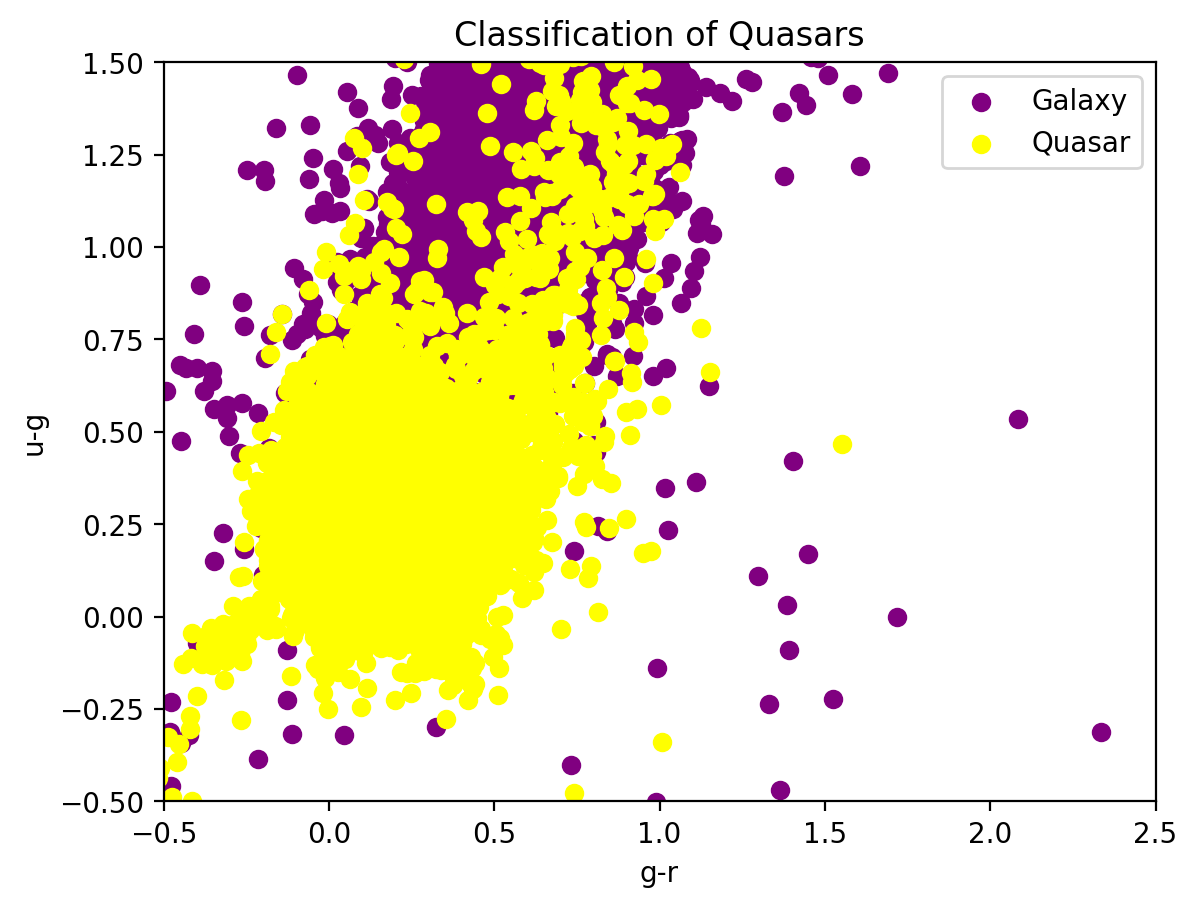

In [6]:
plt.scatter(X[y == 0,1],X[y == 0,0],c='purple',label='Galaxy')
plt.scatter(X[y == 1,1],X[y == 1,0],c='yellow',label='Quasar')
plt.xlim(-0.5,2.5)
plt.ylim(-0.5,1.5)
plt.title("Classification of Quasars")
plt.xlabel("g-r")
plt.ylabel("u-g")
plt.legend()
plt.show()

3. Stack all colors and the redshift into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing.

In [7]:
#already made the data matrix and label array so all I have to do is make the train-test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, train_size=0.8)

4. Create a compact `for` loop that iterates over the fitting of a Gaussian Naive Bayes classification algorithm to successively more features of the data. Within the loop, compute and plot an ROC curve. The end result should be a plot showing ROC curves for GNB classification with more and more features of the data, with appropriate axis labels and a legend. Use `xlim` between 0 and 0.01. Which feature seems to make the classification trivially easy? *Note: `predict_proba` returns an array with as many columns as classes. You've labeled quasars as $1$, so for the ROC curve you must make sure to access the relevant quasar probability-- you can find this by accessing the **classes_** attribute of the estimator.*

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve

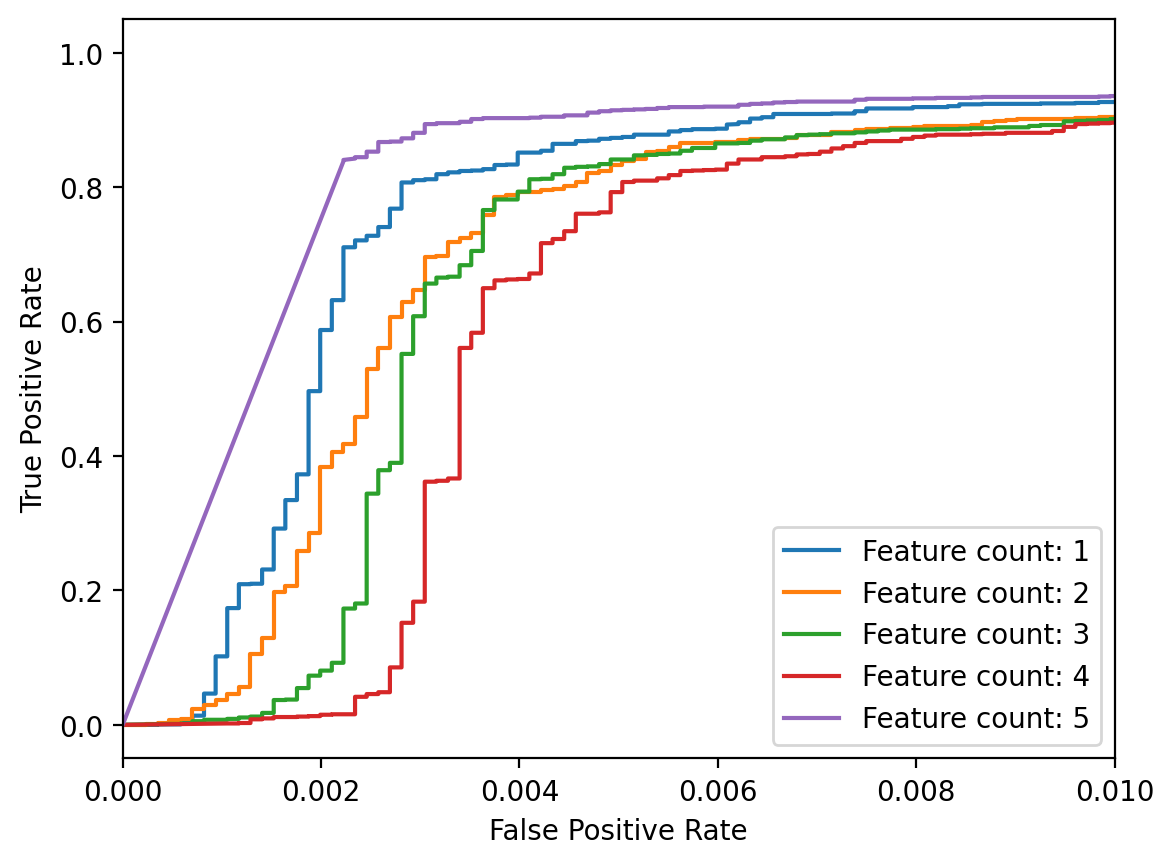

In [29]:
for i in range(1,6):
    gnb = GaussianNB()
    gnb.fit(Xtrain[:,:i],ytrain)
    yprob = gnb.predict_proba(Xtest[:,:i])[:,1]
    fpr, tpr, thresh = roc_curve(ytest, yprob)
    plt.plot(fpr,tpr,label="Feature count: "+str(i))
plt.xlim(0,0.01)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

5. Repeat (4) for Quadratic Discriminant Analysis. 

In [30]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

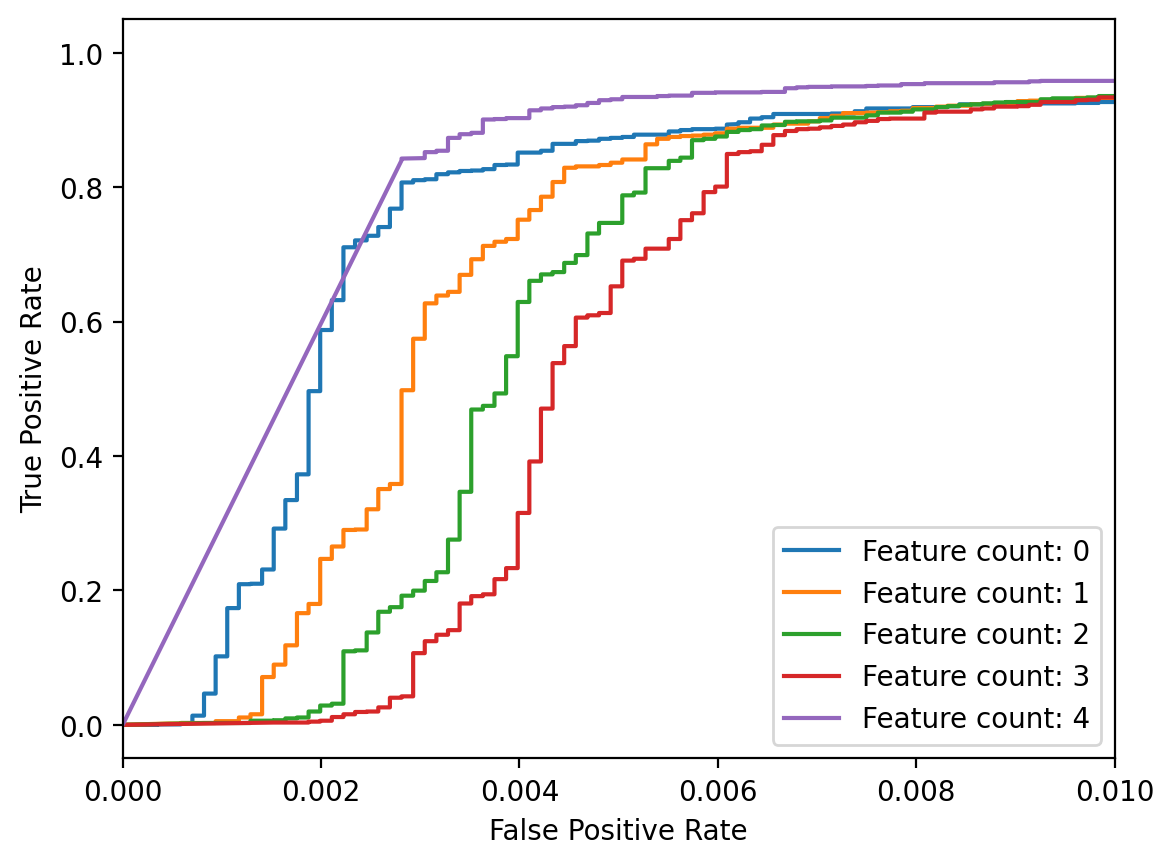

In [31]:
for i in range(5):
    qda = QDA()
    qda.fit(Xtrain[:,0:i+1],ytrain)
    yprob = qda.predict_proba(Xtest[:,0:i+1])[:,1]
    fpr, tpr, thresh = roc_curve(ytest, yprob)
    plt.plot(fpr,tpr,label="Feature count: "+str(i))
plt.xlim(0,0.01)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

6. Let's try classification with GMM Bayes. Restrict the training and testing to be just on the $4$ colors. Iterate now over number of components in the GMM Bayes fit up to $10$, plotting ROC curves for all, and find the number of components that gives the best performance.

In [32]:
from astroML.classification import GMMBayes

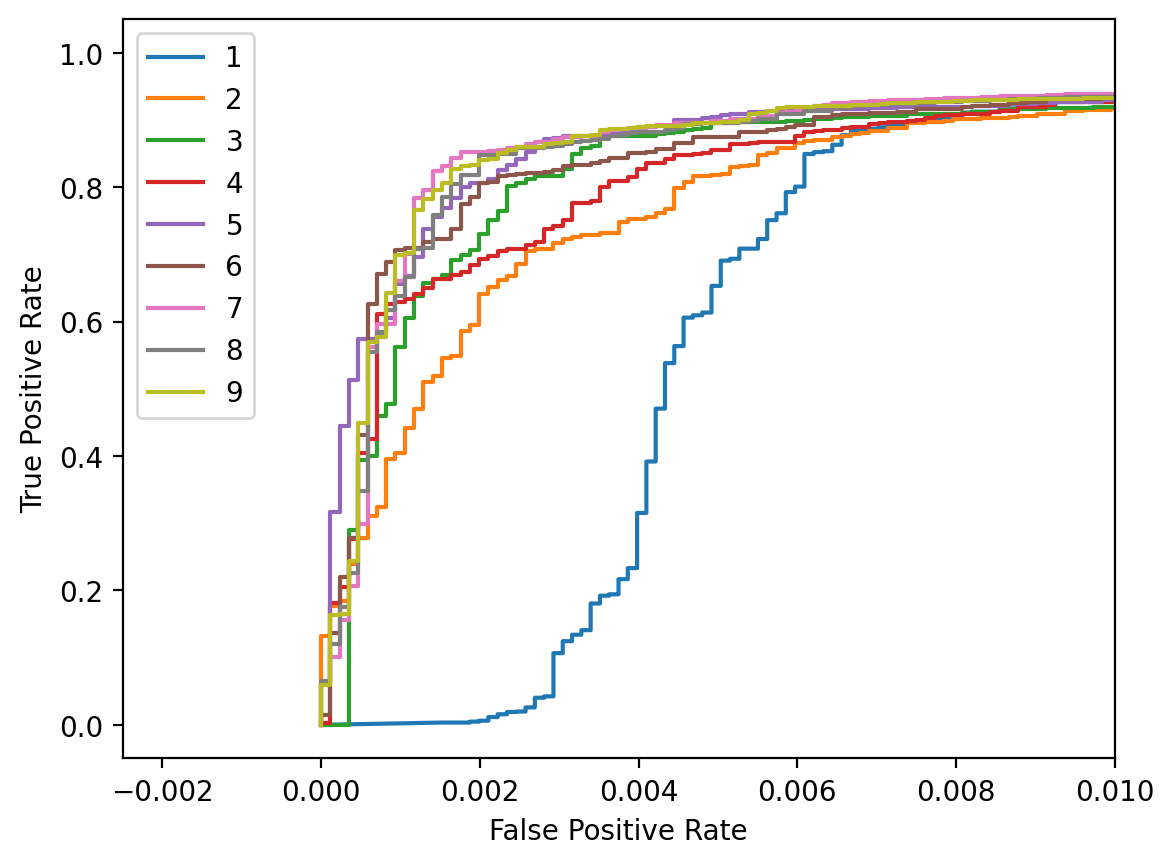

In [34]:
for i in range(1,10):
    gmmb = GMMBayes(i) 
    gmmb.fit(Xtrain[:,0:4],ytrain)
    yprob = gmmb.predict_proba(Xtest[:,0:4])[:,1]
    fpr, tpr, thresh = roc_curve(ytest, yprob)
    plt.plot(fpr,tpr,label=str(i))

plt.xlim(-0.0025,0.01)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

<font color="blue"> Looks like the best curve is at 5 </font>

7. Repeat (6) for $K$-nearest neighbor classification, looping over number of neighbors between 5 and 100 in steps of 10. Find the number that gives the best performance. 

In [35]:
from sklearn.neighbors import KNeighborsClassifier as KN

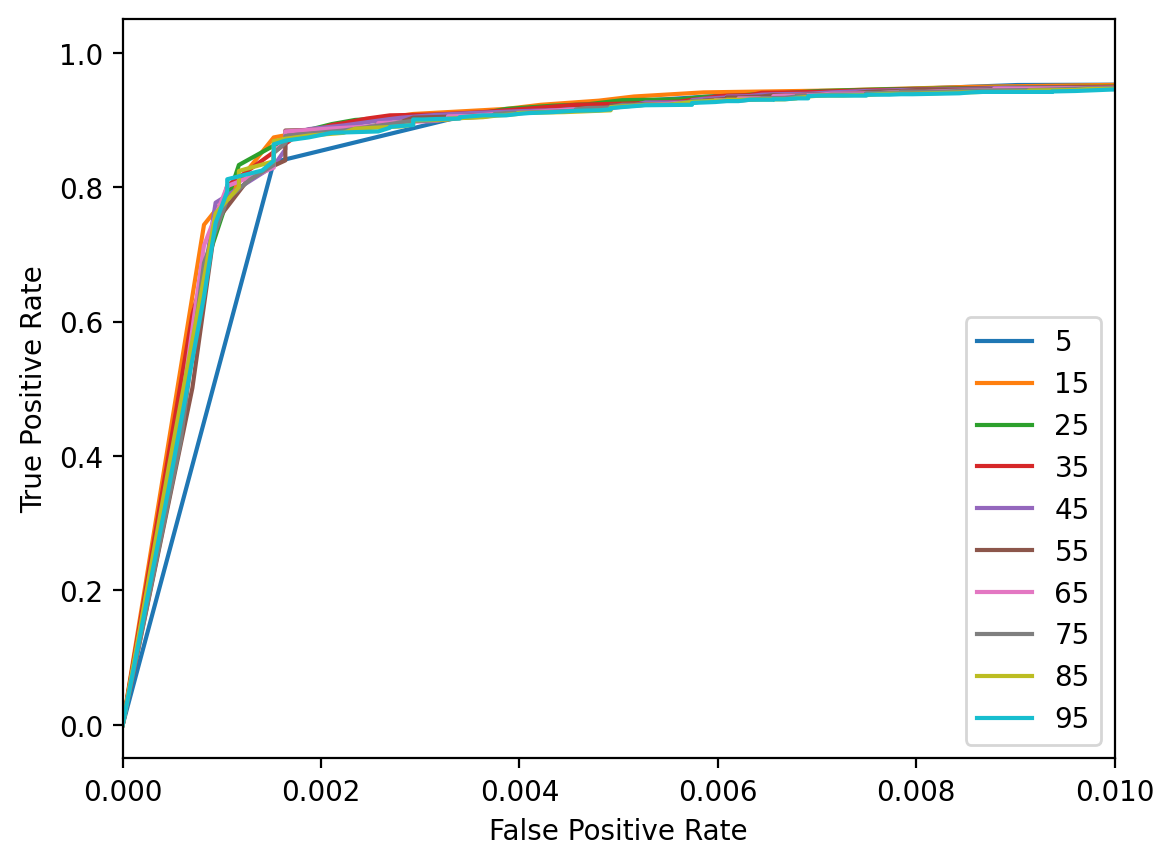

In [36]:
for i in range(5,100,10):
    gmmb =  KN(i)
    gmmb.fit(Xtrain[:,0:4],ytrain)
    yprob = gmmb.predict_proba(Xtest[:,0:4])[:,1]
    fpr, tpr, thresh = roc_curve(ytest, yprob)
    plt.plot(fpr,tpr,label=str(i))

plt.xlim(0,0.01)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

<font color="blue"> Best amount of neighbors is hard to see, but looks like it might be 35 </font>

8. Repeat (6) for Decision Tree classification, looping over the maximum tree depth between 1 and 10. Find the number that gives the best performance. 

In [37]:
from sklearn.tree import DecisionTreeClassifier as DT

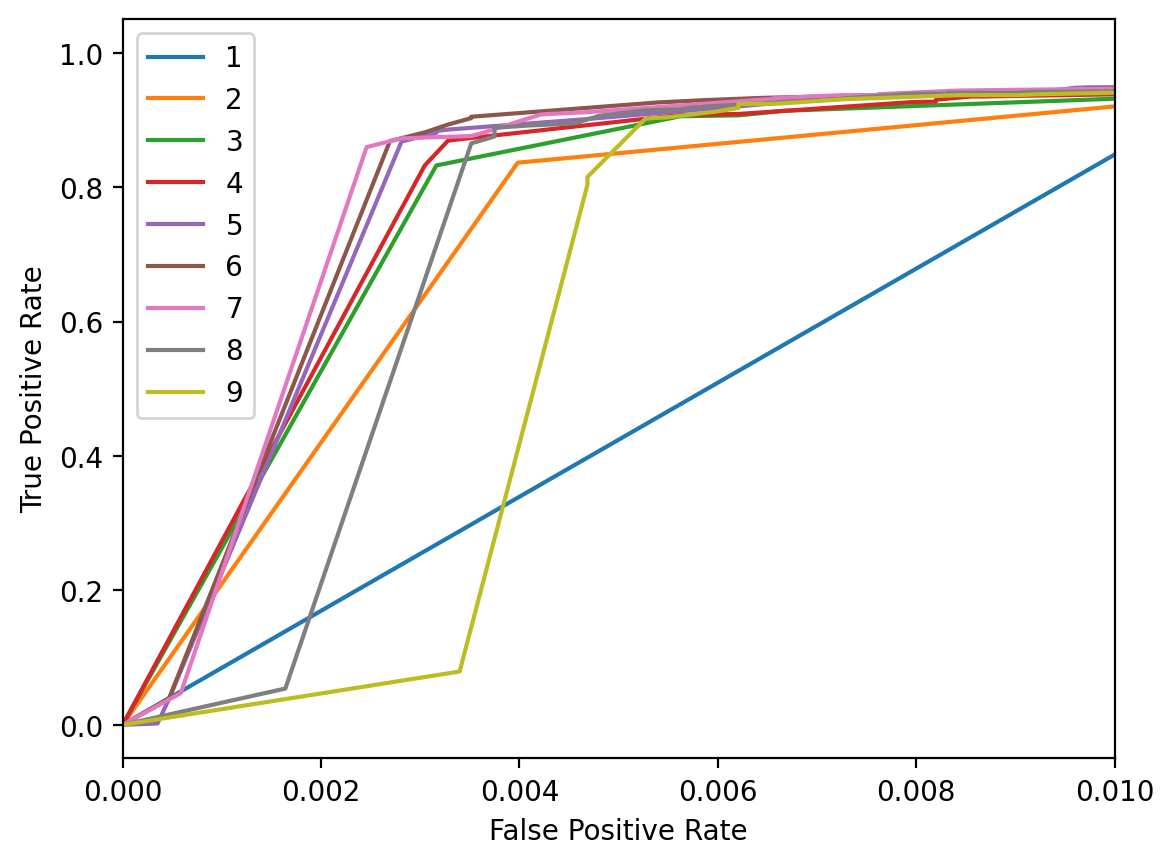

In [38]:
for i in range(1,10):
    gmmb =  DT(max_depth=i)
    gmmb.fit(Xtrain[:,0:4],ytrain)
    yprob = gmmb.predict_proba(Xtest[:,0:4])[:,1]
    fpr, tpr, thresh = roc_curve(ytest, yprob)
    plt.plot(fpr,tpr,label=str(i))

plt.xlim(0,0.01)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

<font color="blue"> The best curve here seems to be for 7 depth </font>

9. Finally, plot the ROC curves for GNB, QDA, and the best-performing GMMBayes, KNN, and DT classification algorithms, all using just the 4 colors. What is the overall best-performing classifier? 

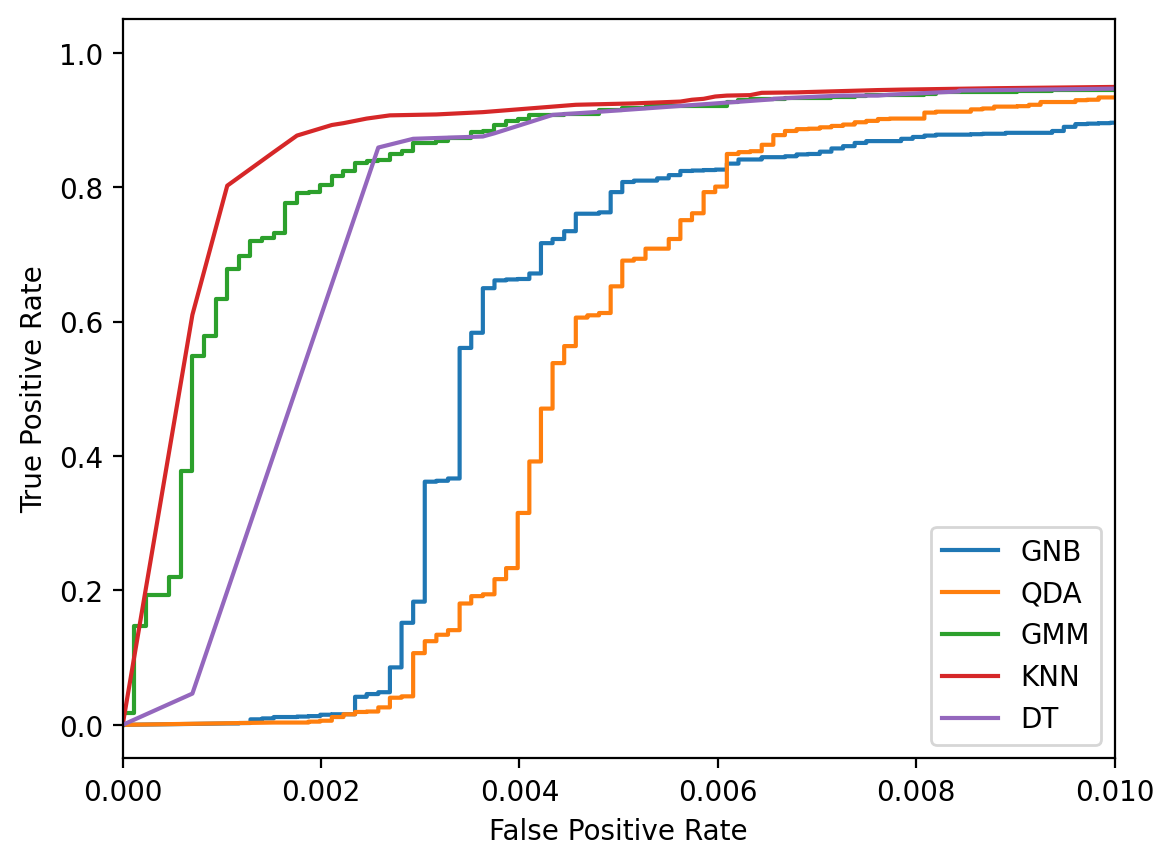

In [39]:
#Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(Xtrain[:,0:4],ytrain)
yprob = gnb.predict_proba(Xtest[:,0:4])[:,1]
fpr, tpr, thresh = roc_curve(ytest, yprob)
plt.plot(fpr,tpr,label="GNB")

#QDA
qda = QDA()
qda.fit(Xtrain[:,0:4],ytrain)
yprob = qda.predict_proba(Xtest[:,0:4])[:,1]
fpr, tpr, thresh = roc_curve(ytest, yprob)
plt.plot(fpr,tpr,label="QDA")

#GMM
gmmb = GMMBayes(5) 
gmmb.fit(Xtrain[:,0:4],ytrain)
yprob = gmmb.predict_proba(Xtest[:,0:4])[:,1]
fpr, tpr, thresh = roc_curve(ytest, yprob)
plt.plot(fpr,tpr,label="GMM")

#KNN
gmmb =  KN(35)
gmmb.fit(Xtrain[:,0:4],ytrain)
yprob = gmmb.predict_proba(Xtest[:,0:4])[:,1]
fpr, tpr, thresh = roc_curve(ytest, yprob)
plt.plot(fpr,tpr,label="KNN")

#DT
gmmb =  DT(max_depth=7)
gmmb.fit(Xtrain[:,0:4],ytrain)
yprob = gmmb.predict_proba(Xtest[:,0:4])[:,1]
fpr, tpr, thresh = roc_curve(ytest, yprob)
plt.plot(fpr,tpr,label="DT")

#Plot info
plt.xlim(0,0.01)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

10. Make a 2-panel plot, showing in the left panel the color-coded training data in $(u-g)$ versus $(g-r)$ (similar to item 2 above), and in the right panel the same features of the testing data color coded by their predicted class from the tuned best-performing classifier. 

In [41]:
kn = KN(35) 
kn.fit(Xtrain[:,0:4],ytrain)
ypred = kn.predict(Xtest[:,0:4])

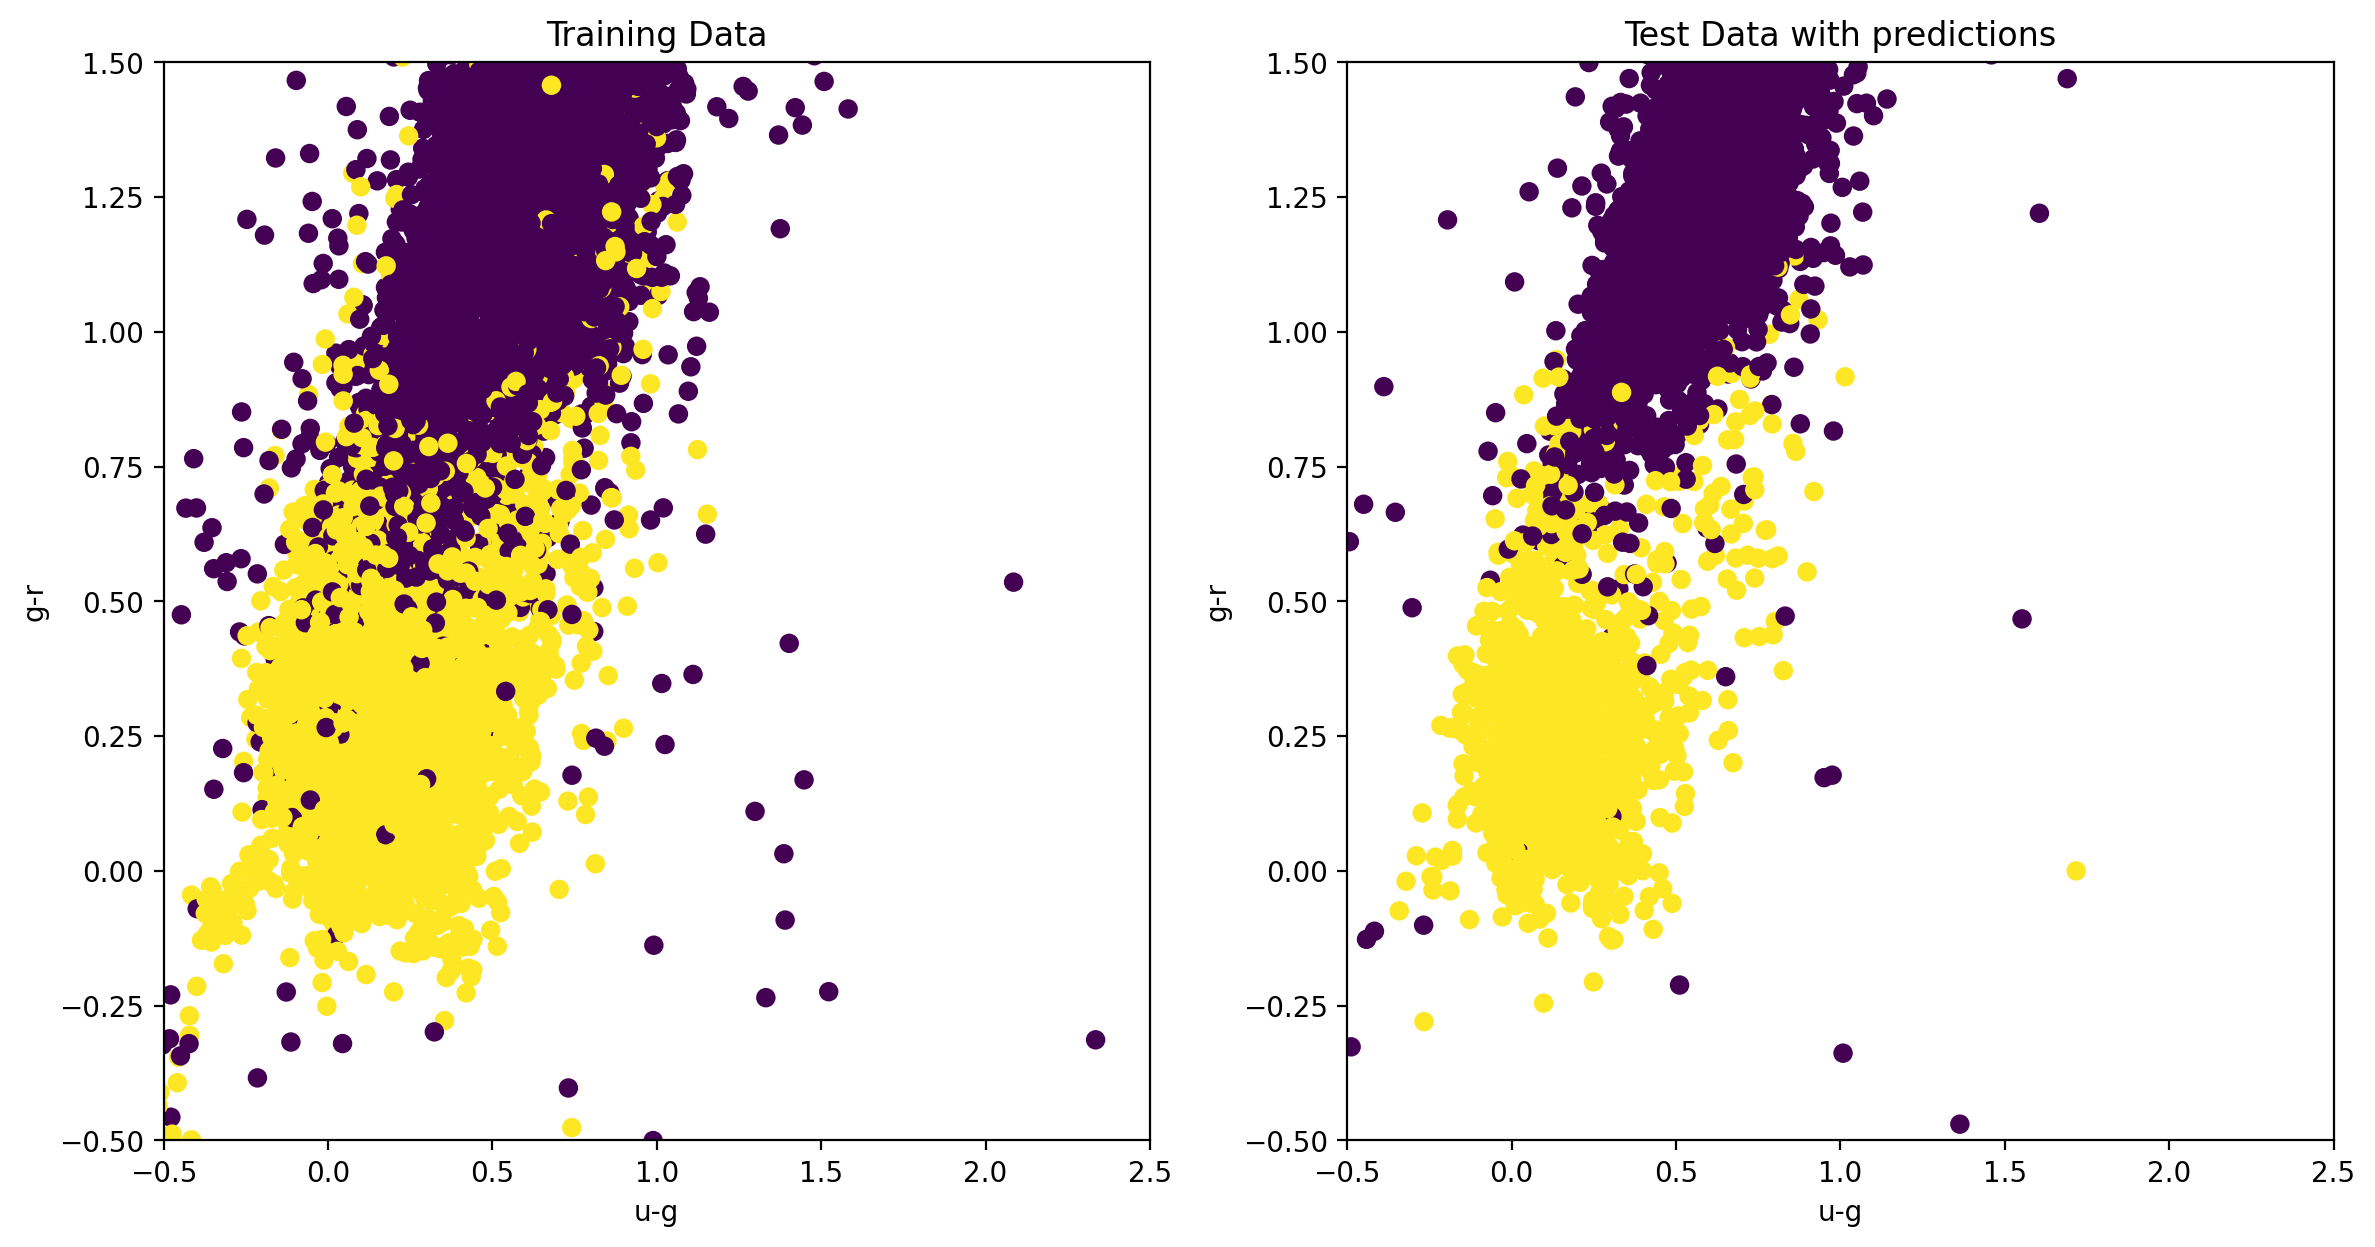

In [163]:
fig, axs = plt.subplots(1,2,figsize=(14,7))

axs[0].scatter(Xtrain[:,1],Xtrain[:,0], c=ytrain)
axs[0].set_title("Training Data")
axs[0].set_xlabel("u-g")
axs[0].set_ylabel("g-r")

axs[1].scatter(Xtest[:,1],Xtest[:,0],c=ypred)
axs[1].set_title("Test Data with predictions")
axs[1].set_xlabel("u-g")
axs[1].set_ylabel("g-r")

axs[0].set_xlim(-0.5,2.5)
axs[0].set_ylim(-0.5,1.5)

axs[1].set_xlim(-0.5,2.5)
axs[1].set_ylim(-0.5,1.5)

plt.show()

## Problem 2

The first few steps of this problem are the same as the previous problem.


1. Read in the same galaxy color data used above. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 

In [43]:
data = np.load("hw8_data_1.npy")
ug = data['u'] - data['g']
gr = data['g'] - data['r']
ri = data['r'] - data['i']
iz = data['i'] - data['z']

#create array for redshift
redshift = data['redshift']
redshift_err = data['redshift_err']
spectralClass = data['specClass']

#create label target array a little early
label = spectralClass.copy()
label[label == "QSO"] = 1
label[label != '1'] = 0
label = label.astype(int)

#create data matrix a little early
X = np.column_stack(np.array([ri,iz]))
#Relabel label matrix as y
y = label


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.

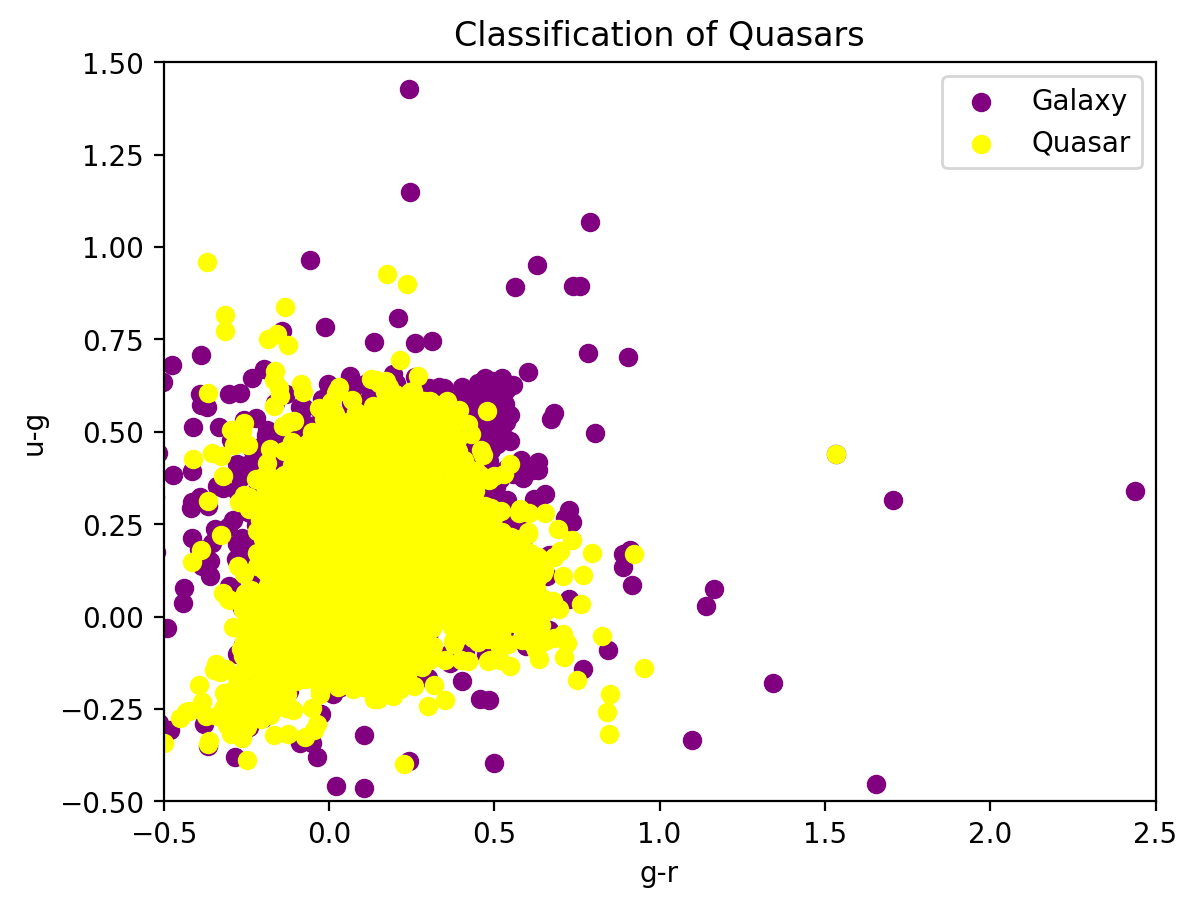

In [44]:
plt.scatter(X[y == 0,1],X[y == 0,0],c='purple',label='Galaxy')
plt.scatter(X[y == 1,1],X[y == 1,0],c='yellow',label='Quasar')
plt.xlim(-0.5,2.5)
plt.ylim(-0.5,1.5)
plt.title("Classification of Quasars")
plt.xlabel("g-r")
plt.ylabel("u-g")
plt.legend()
plt.show()

3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).

In [45]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, train_size=0.8, random_state=42)

4. Scale your training and testing data to prepare it for the DNN. 

In [47]:
from sklearn import preprocessing

In [48]:
s_Xtrain = preprocessing.scale(Xtrain)
s_Xtest = preprocessing.scale(Xtest)
s_ytrain = preprocessing.scale(ytrain)
s_ytest = preprocessing.scale(ytest)

5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 

In [49]:
from sklearn.neural_network import MLPClassifier

In [56]:
clf = MLPClassifier(activation='relu',solver='sgd',hidden_layer_sizes=(5, 2),random_state=42, max_iter=100).fit(s_Xtrain, ytrain)
yprob = clf.predict_proba(s_Xtest)[:,1]

/home/js3/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


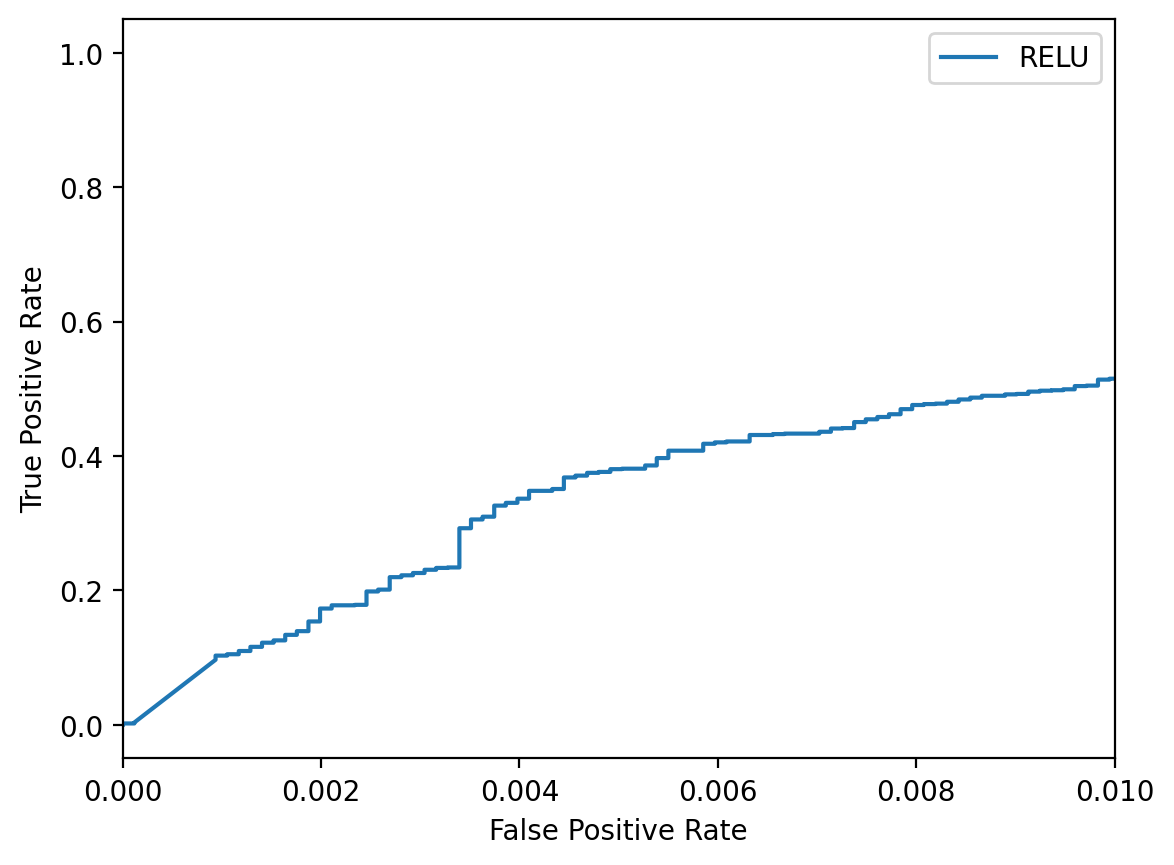

In [60]:
fpr, tpr, thresh = roc_curve(ytest, yprob)
plt.plot(fpr,tpr,label="RELU")
#Plot info
plt.xlim(0,0.01)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.

In [50]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
clf = GridSearchCV(MLPClassifier(),parameters,n_jobs=-1)
clf.fit(s_Xtrain,ytrain)

/home/js3/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/js3/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/js3/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIO

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(2, 2), (5, 5), (5, 2),
                                                (5, 5, 5)],
                         'max_iter': [1000], 'random_state': [42],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [64]:
print("Best score: ",clf.best_score_)
print("Best params: ", clf.best_params_)

Best score:  0.936075
Best params:  {'activation': 'tanh', 'hidden_layer_sizes': (5, 5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'adam'}


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

In [66]:
best = MLPClassifier(activation='tanh',solver='adam',hidden_layer_sizes=(5, 5, 5),random_state=42, max_iter=1000).fit(s_Xtrain, ytrain)
yprob_best = best.predict_proba(s_Xtest)[:,1]

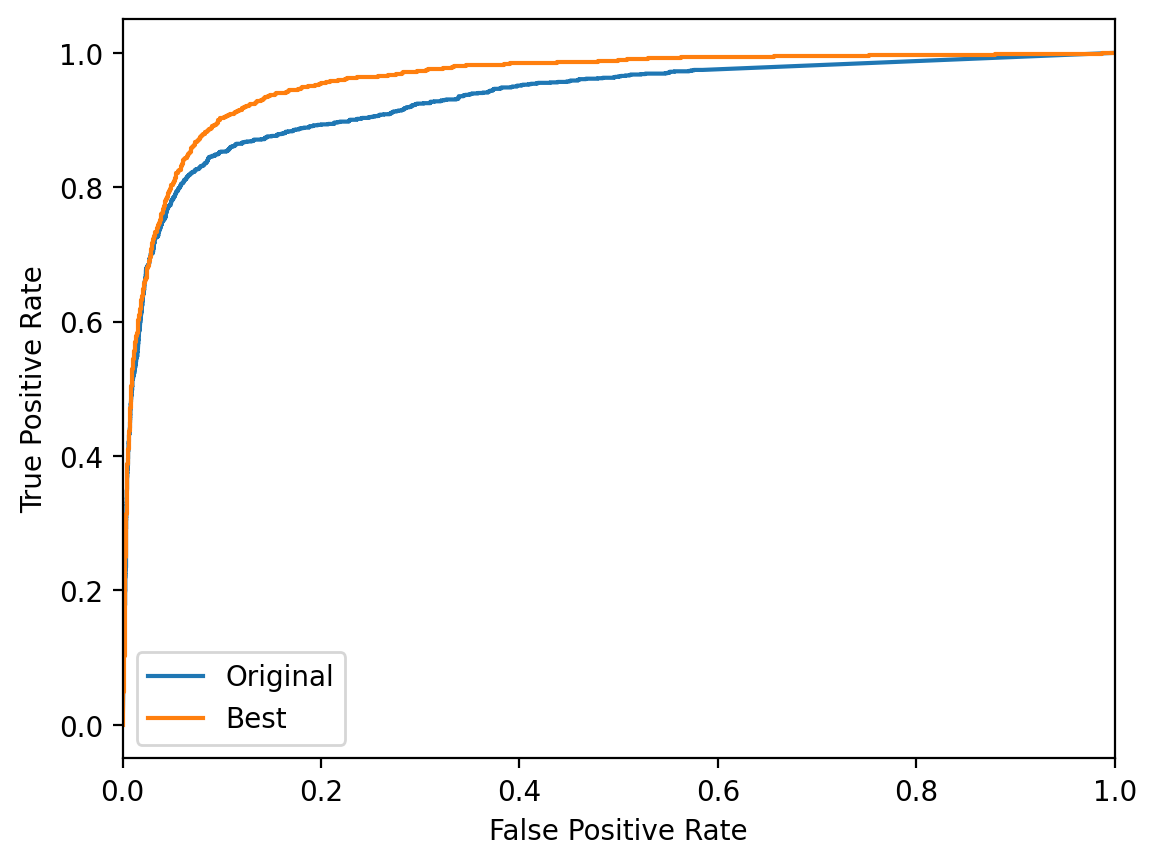

In [67]:
fpr_best, tpr_best, thresh_best = roc_curve(ytest, yprob_best)
plt.plot(fpr,tpr,label="Original")
plt.plot(fpr_best,tpr_best, label="Best")
#Plot info
plt.xlim(0,1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()